# Task 1

## Predict the percentage of a student based on the no. of study hours

#### **Author**: Aurobindo Parida

 Lets import some modules required for the task.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Lets import and read the dataset

In [6]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data import sucessful")

data.head()

Data import sucessful


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Preparing the data for training
We shall split the data into indepenedent variable (x) and dependent variable (y) 

In [7]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values
print("x: ",x,"\n y: ",y)

x:  [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]] 
 y:  [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


#### Lets plot the data to see any relationship between hours studied and percemtage scored

We can plot the data using the following code

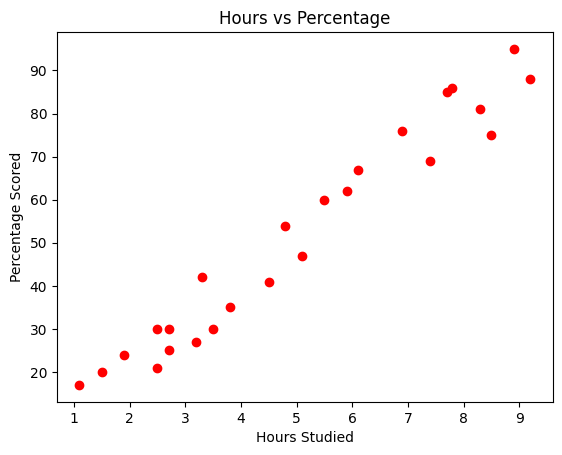

In [21]:
plt.scatter(x,y, color="red")
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()


Now we shall further divide the data into train sets (x_train and y_train) and test sets (x_test,y_test).

We shall do this using an inbuilt function train_test_split() from scikit-learn.

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/5, random_state = 0)
print( "Training Set:", x_train, y_train, "\n Test set",x_test, y_test)

Training Set: [[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]] [35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41] 
 Test set [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]] [20 27 69 30 62]


## Training the Algorithm

We shall train the algorithm using linear regression 

In [9]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train)
'Training is complete.'

'Training is complete.'

#### Plotting the regressor line

<Axes: >

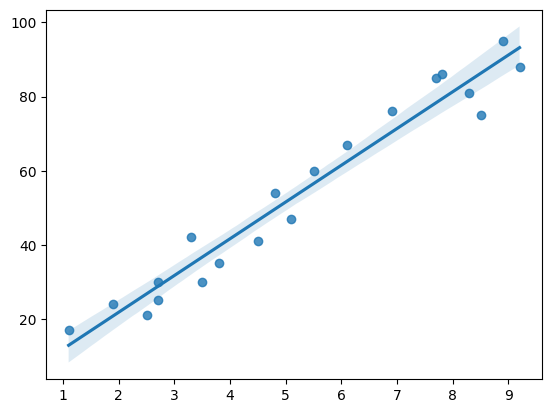

In [10]:
sb.regplot(x = x_train, y = y_train)

### Time to make prediction
After training the dataset we shall now predict the data from test set.

In [15]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Now we shall compare between actual data and predicted data.

In [16]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Now testing with our own data

In [18]:
hours = np.array(9.25)
h = hours.reshape(-1,1)
own_pred = regressor.predict(h)
print("No of Hours = {}".format(hours))
print("Predicted Score={}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score=93.69173248737535


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
